<a href="https://colab.research.google.com/github/Reiniery/Computational-Physics/blob/main/ode/ode_2_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making Integration Code Modular

## Use Functions

In this section, we re-write our Euler code around two functions:
* First, we define a function to return the derivative $f(y,t)$ in our differential equation:  $$\frac{dy}{dt}=f(y,t).$$
* Second, we create a function called `Euler()` that performs the numerical integration

Here are the details for each function.

**Derivative Function:**
* We name our function that returns the derivative in the exponential growth ODE `deriv_exp()1.
* Passed parameters:
    * time
    * dependent variable $y$
    * growth rate parameter $a$
* Returned value:
    * derivative $ay$

**Euler Integration Function**
* We name this function `Euler()`
* Passed parameters:
    * `deriv` = function that returns the derivative defining our ODE
    * `y0` = initial condition for variable `y`
    * `tmax` = upper integration limit in time
    * `params` = tuple containing one or more parameters that will be passed to the derivative function.
* Returned values:
    * `t` = numpy array containing time values in the numerical integration
    * `y` = result of the numerical integration

### 🔆 Example:  Exponential Growth (revised)

In this example, we re-write our exponential growth example using Euler integration and the modular approach described above. Our differential equation is $$\frac{dy}{dt}=ay.$$

**Note:** We want to write our code generally, so that the derivative function can take one or more parameters. In the main code we bundle the parameters in an array called `params`. But in the derivative function, the parameters are listed as separate variables. To handle this, we need to "unpack" the `params` array and assign each element of the array to each of the parameters in the derivative function. To do this we use the "unpacking" operator, i.e. we place an asterisk * before the name of our `params` array when we pass it to the derivative function like this:

```
        f = deriv(t[n], y[n], *params)  # use "*" to unpack params
```
Here's the code:

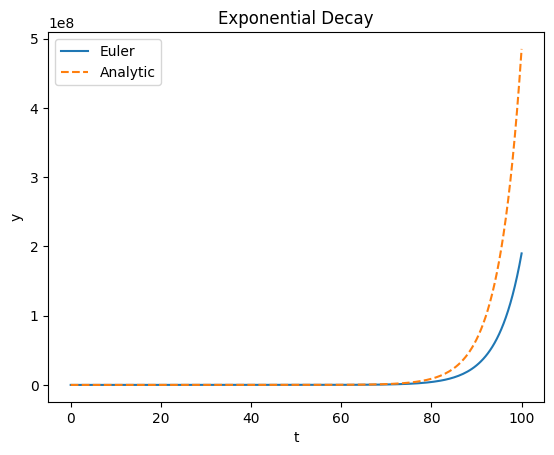

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#########  Derivative Function  #########
#
# This function returns the derivative for the exponential growth ODE dy/dt = ay

#########  Derivative Function  #########

def deriv_exp(t, y, a):

    dydt = a*y
    return dydt


#########  Euler Integration  #########

def Euler(deriv, y0, tmax, dt, params):

    #########  Create Arrays  #########

    N = int(tmax/dt)+1    # number of steps in simulation
    y = np.zeros(N)       # array to store y values
    t = np.zeros(N)       # array to store times

    y[0] = y0             # assign initial value

    #########  Loop to implement the Euler update rule  #########

    for n in range(N-1):
        f = deriv(t[n], y[n], *params)  # use "*" to unpack params
        y[n+1] = y[n] + f*dt
        t[n+1] = t[n] + dt

    return t, y


#########  Parameters  #########

a    = 0.2       # decay constant
tmax = 100       # maximum time
dt   = 0.5       # time step
y0   = 1         # initial value of y

params = [a]     # bundle parameters in an array


#########  Perform Euler Integration  #########

t, y =  Euler(deriv_exp, y0, tmax, dt, params)


#########  Analytic Solution  #########

y_true = y0 * np.exp(a*t)


#########  Plot Solution  #########

plt.plot(t, y, label='Euler')
plt.plot(t, y_true, '--', label='Analytic')

plt.xlabel('t')                  # label the x and y axes
plt.ylabel('y')
plt.title("Exponential Decay")   # give the plot a title
plt.legend()                     # display the legend
plt.show()                       # display the plot

### ✅ Skill Check 1

In this example, you will solve for the number of photons $n$ in a laser cavity. Use the example above to solve the following ODE for $n(t)$: $$ \frac{dn}{dt} = (GN_0 -k) n- (\alpha G) n^2$$ where $n$ is the number of photons in the laser field and
* $N_0$ = population of photons without laser action
* $G$     = gain coefficient
* $\alpha$ = rate at which atoms return to ground state
* $k$     = rate constant, where $1/k$ = lifetime of photon in laser

Specifications:
* Replace the `deriv_exp()` function with your own function to return the derivative of the number of laser photons
* Hint: the `params` variable will need to be a list containing the values $N_0$, $G$, etc. You'll need to 'bundle' these parameters together in your main program and the 'unpack' them inside your derivatives function.
* Modify the main part of your program to set up and plot the number of photons as a function of time
* You shouldn't have to modify the `Euler()` function

Run your code to produce two plots:
* First plot. Show multiple trajectories for different initial conditions when the pumping steady state $N_0 = 0.5$
    * Plot $n(t)$ for the initial conditions $n_0 = 0, .4, .8, 1.2, 1.6, 2.0$  for $N_0 = 0.5$, $G=1$, $\alpha = 1$ and $k=1$.
    * Label each curve with the value $n_0$
    * Label the plot with the value $N_0$
* Second plot. Show multiple trajectories for different initial conditions when the pumping steady state $N_0 = 2.0$
    * Plot $n(t)$ for the initial conditions $n_0 = 0, .4, .8, 1.2, 1.6, 2.0$ for $N_0 = 0.5$, $G=1$, $\alpha = 1$ and $k=1$.
    * Label each curve with the value $n_0$
    * Label the plot with the value $N_0$



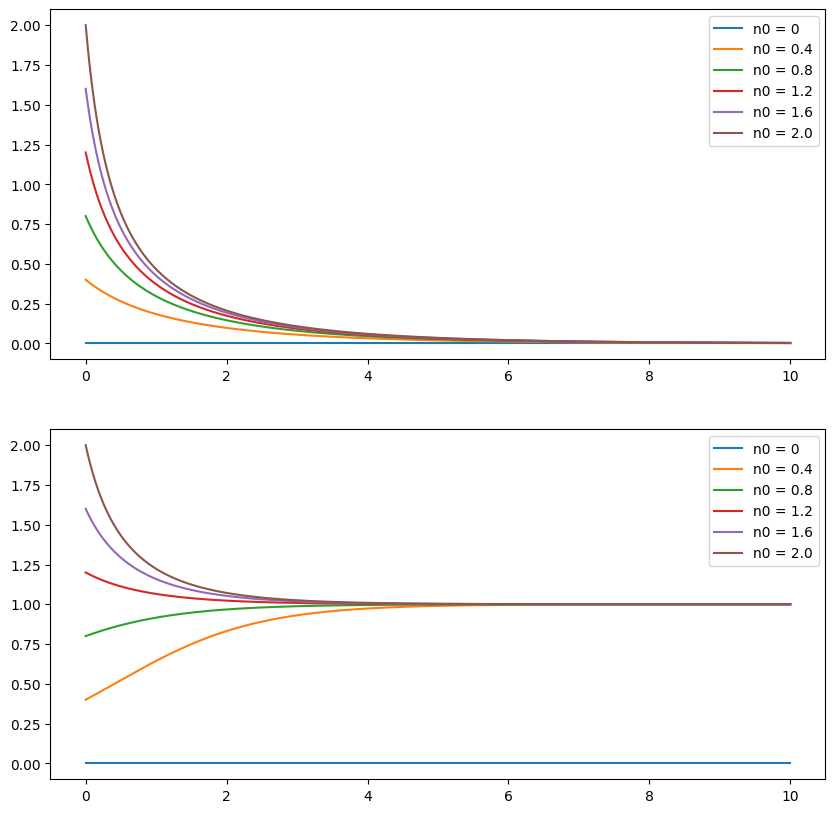

In [20]:
###  Your Code Here
def deriv(t, n,N0,G,alpha,k):

    dndt= (G*N0-k)*n-(alpha*G)*n**2
    return dndt

#parameters
N0=0.5
G=1
alpha=1
k=1
n=0.4

tmax=10
dt=0.01

params=[N0,G,alpha,k]


def laser(deriv, y0, tmax, dt, params):

    #########  Create Arrays  #########

    N = int(tmax/dt)+1    # number of steps in simulation
    y = np.zeros(N)       # array to store y values
    t = np.zeros(N)       # array to store times

    y[0] = y0             # assign initial value

    #########  Loop to implement the Euler update rule  #########

    for n in range(N-1):
        f = deriv(t[n], y[n], *params)  # use "*" to unpack params
        y[n+1] = y[n] + f*dt
        t[n+1] = t[n] + dt

    return t, y

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
for n0 in [0,.4,.8,1.2,1.6,2.0]:
    t,y= laser(deriv, n0, tmax,dt,params)
    plt.plot(t,y, label=f'n0 = {n0}')
    plt.legend()

N0=2
params=[N0,G,alpha,k]
plt.subplot(2,1,2)
for n0 in [0,.4,.8,1.2,1.6,2.0]:
    t,y= laser(deriv, n0, tmax,dt,params)
    plt.plot(t,y, label=f'n0 = {n0}')
    plt.legend()



## Use Arrays to Handle Systems of ODEs

We've already seen one system of ODEs in the previous chapter:  the simple hamonic oscillator.

Second-order ODE's arise naturally from Newton's second law since acceleration is a second order derivative:
$$\frac{d^2x}{dt^2}=a = \frac{F}{m}$$
where the acceleration is potentially a function of position, velocity, time and mass:  $a=F(x, v, t)/m$.

As discussed in the lecture slides, we write this second-order equation as two first-order equations like this:
$$ \frac{dx}{dt} = v $$

$$ \frac{dv}{dt} = \frac{a}{m}. $$

We can write this system of ODEs as a single vector equation, where the components of the generalized vector are position and velocity. If we define our generalized vector as $\vec{y}$, its components will be $$y_0(t) = x(t)$$ and $$y_1(t) = v(t).$$ The vector $\vec{y}$ may be written as
 $$\vec{y} = \begin{pmatrix}y_0(t) \\ y_1(t) \end{pmatrix} = \begin{pmatrix}x \\ v \end{pmatrix}.$$

 With these substitutions, we can write our system of coupled ODEs as
 $$ \frac{dy_0}{dt} = y_1 $$
$$ \frac{dy_1}{dt} = -(k/m)y_0. $$

Our system of differential equations may now be written as a single vector equation:
$$\frac{d\vec{y}}{dt}=\vec{a}(\vec{y},t),$$ where $\vec{a}(\vec{y},t)$ is a vector-valued acceleration:
$$\vec{a}(\vec{y},t)= \begin{pmatrix}v \\ -(k/m)x \end{pmatrix} = \begin{pmatrix}y_1 \\ -(k/m)y_0\end{pmatrix}.$$

We can now apply our favoriate numerical integration method to this single vector-valued ODE. For example the Euler update rule for our generalized state vector would be:
$$ \vec{y}_{n+1} = \vec{y}_n + \vec{a}_n \Delta t.$$



### 🔆 Example:  Vectorized SHO example

Here's the code for the Simple Harmonic Oscillator. We introduce a new derivative function and a new Euler function that handles multi variables.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

#########  Derivative Function  #########
#
# This function returns the derivatives for the
# Simple Harmonic Oscillator ODE

def deriv_sho(t, y, m, k):

    # extract variables from y array
    x = y[0]          # position
    v = y[1]          # velocity

    # calculate derivatives
    dxdt = v
    dvdt = -k/m*x

    # return derivatives in a numpy array
    return np.array([dxdt, dvdt])


In [22]:

#########  Euler Integration  #########
#
# This function integrates an ODE specified by a passed derivative function
#
# Passed parameters:
#   deriv  = function created by the user that returns the derivatives for the system of ODEs
#   y0     = 1xN array containing initial conditions
#   tmax   = maximum time to run the integration
#   dt     = time step
#   params = 1xM array containing parameters for the derivative function
#
# Returned values:
#   t      = 1D array containing time values of the solution
#   y      = 2D array whose columns are the solutions for each variable

#########  Multi-Variable Euler Integration  #########

def Euler_Vec(deriv, y0, tmax, dt, params):

    #########  Create Arrays  #########

    # determine the number of variables in the system from initial conditions
    nvar = 1 if not isinstance(y0, np.ndarray) else y0.size

    N = int(tmax/dt)+1         # number of steps in simulation
    y = np.zeros((N,nvar))     # array to store y values
    t = np.zeros(N)            # array to store times

    if nvar == 1:
        y[0] = y0              # assign initial value if single variable
    else:
        y[0,:] = y0            # assign vector initial values if multivariable

    #########  Loop to implement the Euler update rule  #########

    for n in range(N-1):
        f = deriv(t[n], y[n], *params)
        y[n+1] = y[n] + f*dt
        t[n+1] = t[n] + dt

    return t, y



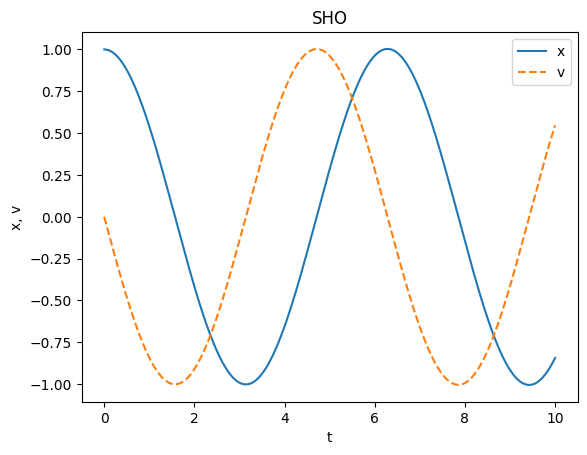

In [23]:
import numpy as np
import matplotlib.pyplot as plt

#########  Parameters  #########

m    = 1         # mass
k    = 1         # spring constant
tmax = 10        # maximum time
dt   = 0.001     # time step
x0   = 1         # initial position
v0   = 0         # initial velocity

params = np.array([m,k])    # bundle parameters together
y0 = np.array([x0,v0])      # bundle initial conditions


#########  Perform Euler Integration  #########

t, y =  Euler_Vec(deriv_sho, y0, tmax, dt, params)

x = y[:,0]       # extract positions
v = y[:,1]       # extract velocities


#########  Plot Solution  #########

plt.plot(t, x, label='x')        # plot position
plt.plot(t, v, '--', label='v')  # plot velocity

plt.xlabel('t')                  # label the x and y axes
plt.ylabel('x, v')
plt.title("SHO")                 # give the plot a title
plt.legend()                     # display the legend
plt.show()                       # display the plot

### ✅ Skill Check 2

Write code to model the motion of a mass attached to a pivot by a spring with spring constant $k$ immersed in a fluid with fluid drag coefficient $b$. Assume the mass can move in the x-y plane.
* Create a derivative function to return the four relevant derivatives:  $dx/dt$, $dy/dt$, $dv_x/dt$, $dv_y/dt$ using:
$$\frac{dx}{dt} = v_x$$
$$\frac{dy}{dt} = v_x$$
$$\frac{dv_x}{dt} = -\frac{kx-bv_x}{m} $$
$$\frac{dv_y}{dt} = -\frac{ky-bv_y}{m} $$
* Make a panel of 2 plots showing the path $(x,y)$ of the mass for different combinations of initial conditions and parameters ($k$, $m$, $b$).
* Scale your plots so they have equal axis scaling.
* Label each subplot with relevant information (so the viewer can see what changed between the plots).


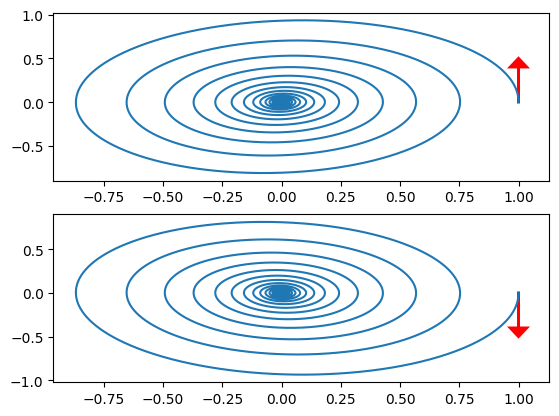

In [52]:
### Your Code Here
def deriv(t, arr, m,k, b):

    # extract variables from y array
    x = arr[0]
    y=arr[1]
    vx = arr[2]
    vy=arr[3]
    # calculate derivatives
    dxdt = vx
    dydt = vy
    dvxdt= -k/m*x - b/m*vx
    dvydt=-k/m*y - b/m*vy

    # return derivatives in a numpy array
    return np.array([dxdt, dydt,dvxdt,dvydt])

#parameters
m=1
k=1
b=.1
dt=0.01
tmax=100

params=np.array([m,k,b])
arr=np.array([1,0,0,1])#x, y,vx,vy

t,z= Euler_Vec(deriv,arr,tmax,dt,params)

x=z[:,0]
y=z[:,1]
plt.subplot(2,1,1)
plt.plot(x,y)
plt.arrow(x=arr[0], y=arr[1], dx=arr[2]*s, dy=arr[3]*s, head_width=0.07, head_length=0.1, fc='red', ec='red',lw=2)

arr=np.array([1,0,0,-1])#x, y,vx,vy
s=0.4
t,z= Euler_Vec(deriv,arr,tmax,dt,params)

x=z[:,0]
y=z[:,1]
plt.subplot(2,1,2)
s=0.4
plt.arrow(x=arr[0], y=arr[1], dx=arr[2]*s, dy=arr[3]*s, head_width=0.07, head_length=0.1, fc='red', ec='red',lw=2)

        # display the plot

plt.plot(x,y)
plt.show()

